APELLIDO Y NOMBRE : BELLO COLQUE JEAN MARCO

SEGUNDO MOMENTO EVALUATIVO

Parte 1: Ruido

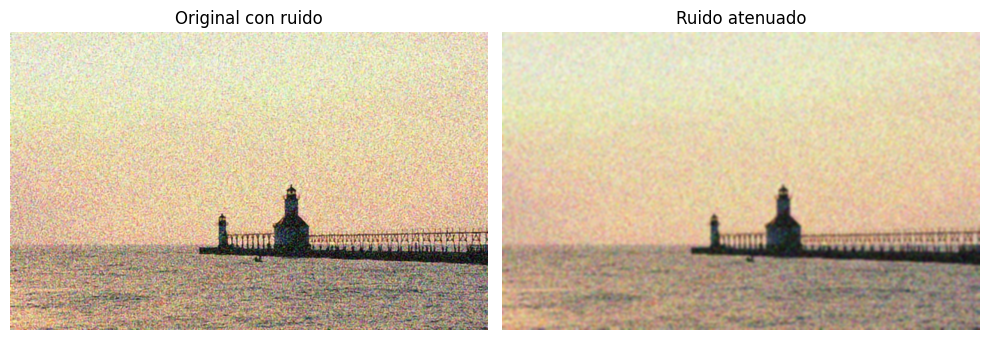

In [24]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("ruido.jpg")
suavizado = cv2.GaussianBlur(img, (7, 7), 2)
orig_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
suav_rgb = cv2.cvtColor(suavizado, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(orig_rgb)
plt.title("Original con ruido")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(suav_rgb)
plt.title("Ruido atenuado")
plt.axis("off")

plt.tight_layout()
plt.show()


Parte 2: Difuminacion

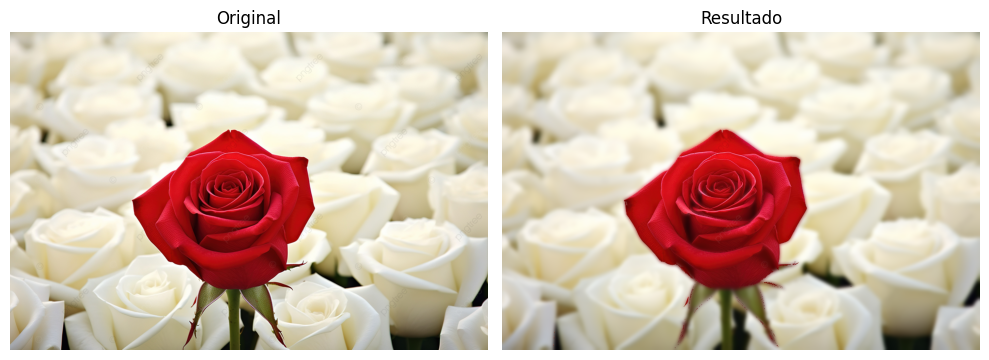

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_color = cv2.imread("rosa.png")
imagen_hsv = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2HSV)
mascara_rojo_bajo = cv2.inRange(imagen_hsv, np.array([0, 100, 100]), np.array([10, 255, 255]))
mascara_rojo_alto = cv2.inRange(imagen_hsv, np.array([160, 100, 100]), np.array([179, 255, 255]))
mascara_rojo = cv2.bitwise_or(mascara_rojo_bajo, mascara_rojo_alto)
mascara_fondo = cv2.bitwise_not(mascara_rojo)
imagen_desenfocada = cv2.GaussianBlur(imagen_color, (21, 21), 0)
primer_plano = cv2.bitwise_and(imagen_color, imagen_color, mask=mascara_rojo)
fondo_desenfocado = cv2.bitwise_and(imagen_desenfocada, imagen_desenfocada, mask=mascara_fondo)
imagen_resultado = cv2.add(primer_plano, fondo_desenfocado)
imagen_original_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
imagen_resultado_rgb = cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_original_rgb)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(imagen_resultado_rgb)
plt.title("Resultado")
plt.axis("off")
plt.tight_layout()
plt.show()


Parte 3: Contar

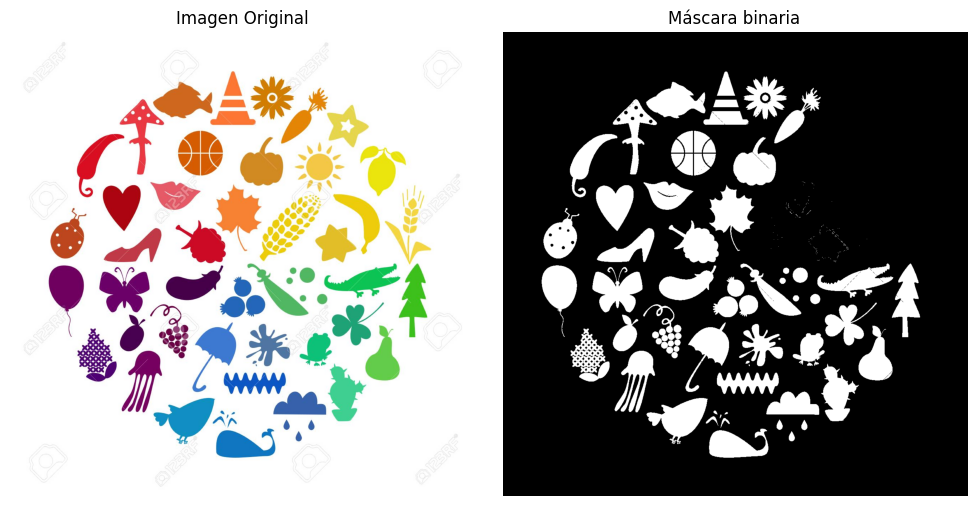

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_color = cv2.imread("Elementos.jpg")
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
_, mascara = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mascara, cmap="gray")
plt.title("Máscara binaria")
plt.axis("off")

plt.tight_layout()
plt.show()


Parte 4 : Convolucion

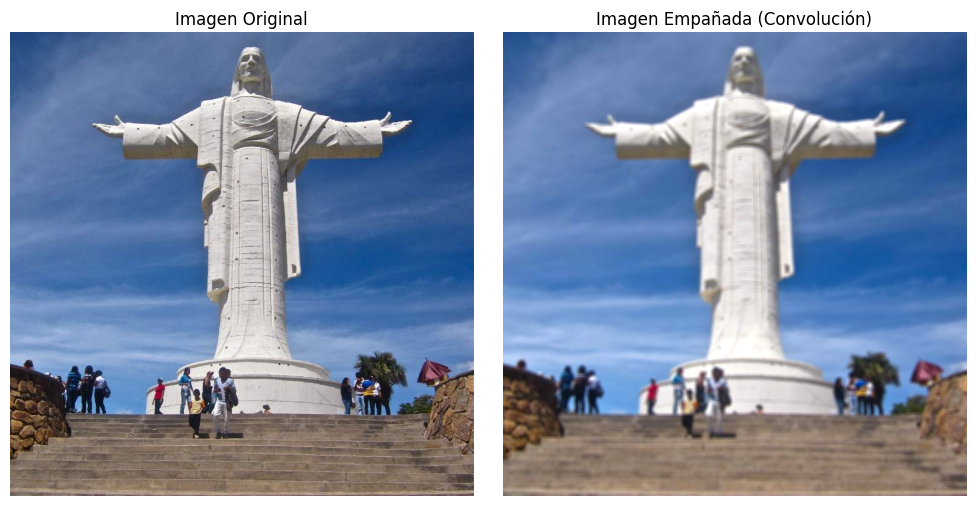

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_color = cv2.imread("Cristo.jpg")
kernel = np.ones((7, 7), dtype=np.float32) / 44
imagen_empanada = cv2.filter2D(imagen_color, -1, kernel)

imagen_original_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
imagen_empanada_rgb = cv2.cvtColor(imagen_empanada, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_original_rgb)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_empanada_rgb)
plt.title("Imagen Empañada (Convolución)")
plt.axis("off")

plt.tight_layout()
plt.show()


Parte 6

Detección de Roberts
Se basa en un kernel 2×2 que calcula diferencias diagonales siendo muy simple y rápido


Detección de Prewitt
Emplea máscaras 3×3 para gradientes horizontales y verticales siendo mas robusto al ruido que Roberts

Detección de Sobel
Es un Prewitt ponderado (coeficiente 2 en el centro) siendo la que mejora la supresión de ruido y realza los gradientes

Detección de Canny
Incluye suavizado Gaussiano, supresión de no máximos y umbral doble con histéresis siendo muy preciso pero robusto al ruido

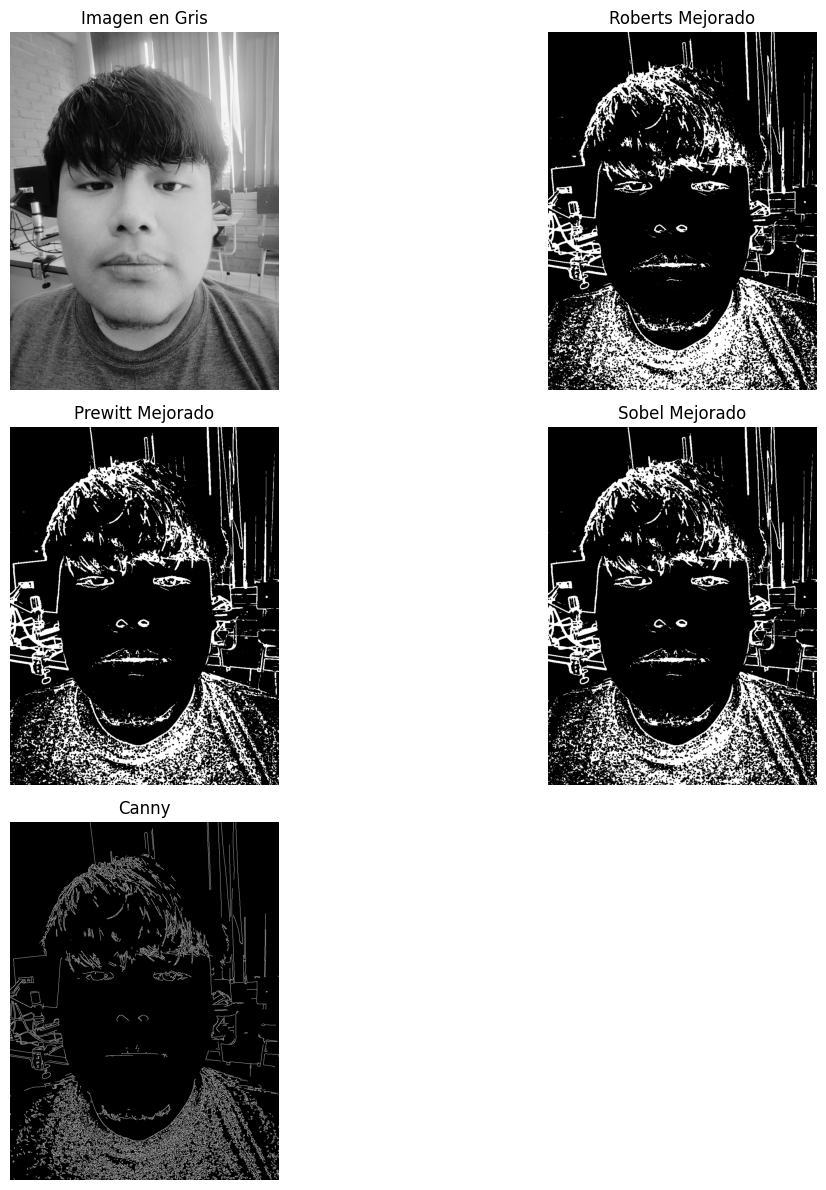

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_mejorado(imagen_color):
    imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (3, 3), 0)
    kernel_x = np.array([[-1, 0], [0, 1]], dtype=np.float32)
    kernel_y = np.array([[0, -1], [1, 0]], dtype=np.float32)
    grad_x = cv2.filter2D(imagen_suavizada, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(imagen_suavizada, cv2.CV_32F, kernel_y)
    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud_norm = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud_uint8 = np.uint8(magnitud_norm)
    _, binaria = cv2.threshold(magnitud_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elemento = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, elemento)

def prewitt_mejorado(imagen_color):
    imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (3, 3), 0)
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    grad_x = cv2.filter2D(imagen_suavizada, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(imagen_suavizada, cv2.CV_32F, kernel_y)
    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud_norm = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud_uint8 = np.uint8(magnitud_norm)
    _, binaria = cv2.threshold(magnitud_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elemento = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, elemento)

def sobel_mejorado(imagen_color):
    imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (3, 3), 0)
    grad_x = cv2.Sobel(imagen_suavizada, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(imagen_suavizada, cv2.CV_32F, 0, 1, ksize=3)
    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud_norm = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud_uint8 = np.uint8(magnitud_norm)
    _, binaria = cv2.threshold(magnitud_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elemento = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, elemento)

imagen_color = cv2.imread("Humano.jpg")
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
bordes_roberts = roberts_mejorado(imagen_color)
bordes_prewitt = prewitt_mejorado(imagen_color)
bordes_sobel = sobel_mejorado(imagen_color)
bordes_canny = cv2.Canny(imagen_gris, 100, 200)

plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title("Imagen en Gris")
plt.axis("off")
plt.subplot(3, 2, 2)
plt.imshow(bordes_roberts, cmap='gray')
plt.title("Roberts Mejorado")
plt.axis("off")
plt.subplot(3, 2, 3)
plt.imshow(bordes_prewitt, cmap='gray')
plt.title("Prewitt Mejorado")
plt.axis("off")
plt.subplot(3, 2, 4)
plt.imshow(bordes_sobel, cmap='gray')
plt.title("Sobel Mejorado")
plt.axis("off")
plt.subplot(3, 2, 5)
plt.imshow(bordes_canny, cmap='gray')
plt.title("Canny")
plt.axis("off")
plt.tight_layout()
plt.show()


Parte 6:

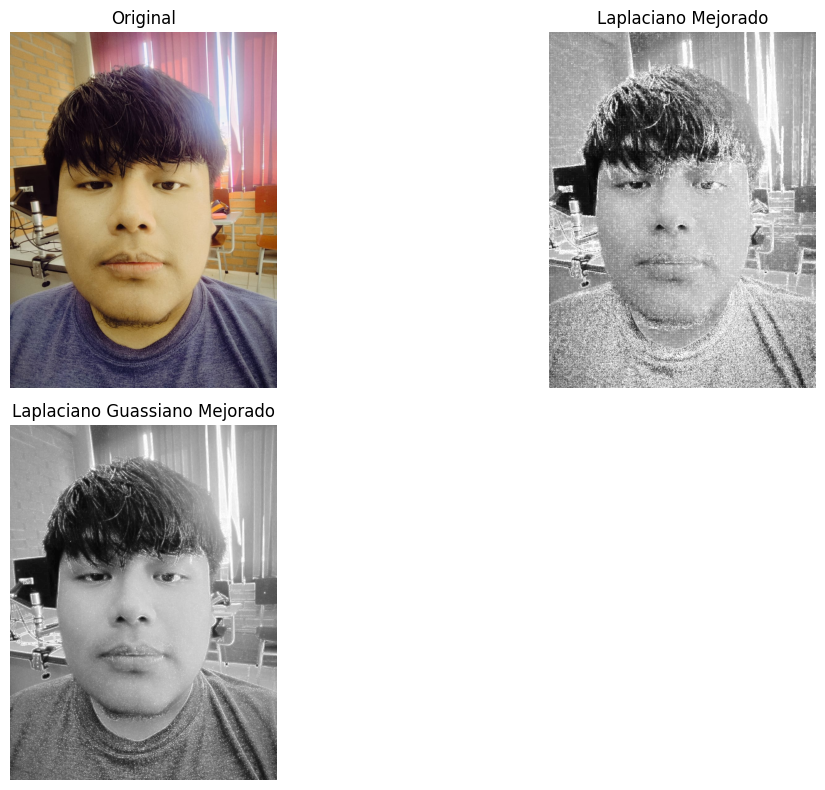

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_color = cv2.imread("Humano.jpg")
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

mascara_laplaciano = cv2.Laplacian(imagen_gris, cv2.CV_64F, ksize=3)
laplaciano_abs = cv2.convertScaleAbs(mascara_laplaciano)

imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 1.0)
mascara_log = cv2.Laplacian(imagen_suavizada, cv2.CV_64F, ksize=3)
log_abs = cv2.convertScaleAbs(mascara_log)

bordes_mejorados_laplaciano = cv2.addWeighted(imagen_gris, 1.0, laplaciano_abs, 1.5, 0)
bordes_mejorados_log = cv2.addWeighted(imagen_gris, 1.0, log_abs, 1.5, 0)

imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
imagen_laplaciano_rgb = cv2.cvtColor(bordes_mejorados_laplaciano, cv2.COLOR_GRAY2RGB)
imagen_log_rgb = cv2.cvtColor(bordes_mejorados_log, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(imagen_rgb)
plt.title("Original")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(imagen_laplaciano_rgb)
plt.title("Laplaciano Mejorado")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(imagen_log_rgb)
plt.title("Laplaciano Guassiano Mejorado")
plt.axis("off")
plt.tight_layout()
plt.show()
